In [1]:
import numpy as np
from mp_api.client import MPRester
import re
import pandas as pd
import matplotlib.pyplot as plt

In [28]:
formEs = pd.read_csv('formEs.csv', header=None, skiprows=1)
print(len(formEs))
possiblealloys_dset = pd.read_csv('possiblealloys_dset_data.csv', header=None)
possiblealloys_calculation2 = np.array(possiblealloys_dset.iloc[:,2])
print(len(possiblealloys_calculation2))
possiblealloys_dset.iloc[:,2] = formEs[0:105117]

realizedalloys_dset = pd.read_csv('realizedalloys_dset_data.csv', header=None)
realizedalloys_calculation2 = np.array(realizedalloys_dset.iloc[:,2])
print(len(realizedalloys_calculation2))
realizedalloys_dset.iloc[:,2] = formEs[105117:154718]

materialalloys_dset = pd.read_csv('material_dset_data.csv', header=None)
materialalloys_calculation2 = np.array(materialalloys_dset.iloc[:,2])
print(len(materialalloys_calculation2))
materialalloys_dset.iloc[:,2] = formEs[154718:175981]


175981
105117
49601
21263


In [29]:
import chemparse
possiblealloys_dset = np.array(possiblealloys_dset)
netformE_possible = []
for alloy in possiblealloys_dset:
    name = alloy[0]
    formEperatom = alloy[1]
    coefficients = np.asarray(list(chemparse.parse_formula(name).values()))
    numatoms = np.sum(coefficients)
    netformE = numatoms * formEperatom
    netformE_possible = np.append(netformE_possible,netformE)
    
possible_netformE = pd.DataFrame(netformE_possible)
    
realizedalloys_dset = np.array(realizedalloys_dset)
netformE_realized = []
for alloy in realizedalloys_dset:
    name = alloy[0]
    formEperatom = alloy[1]
    coefficients = np.asarray(list(chemparse.parse_formula(name).values()))
    numatoms = np.sum(coefficients)
    netformE = numatoms * formEperatom
    netformE_realized = np.append(netformE_realized,netformE)
    
realized_netformE = pd.DataFrame(netformE_realized)

materialalloys_dset = np.array(materialalloys_dset)
netformE_material = []
for alloy in materialalloys_dset:
    name = alloy[0]
    formEperatom = alloy[1]
    coefficients = np.asarray(list(chemparse.parse_formula(name).values()))
    numatoms = np.sum(coefficients)
    netformE = numatoms * formEperatom
    netformE_material = np.append(netformE_material,netformE)
    
material_netformE = pd.DataFrame(netformE_material)
    

In [30]:
possible_netformE

,0
0,-49.036729
1,-17.822662
2,-41.254260
3,-1.072124
4,-2.801171
...,...
105112,-8.280110
105113,-7.228601
105114,0.689404
105115,-75.152939


In [31]:
possiblealloys_dset = pd.read_csv('possiblealloys_dset_data.csv', header=None)
possiblealloys_dset.iloc[:,1] = possible_netformE
realizedalloys_dset = pd.read_csv('realizedalloys_dset_data.csv', header=None)
realizedalloys_dset.iloc[:,1] = realized_netformE
materialalloys_dset = pd.read_csv('material_dset_data.csv', header=None)
materialalloys_dset.iloc[:,1] = material_netformE

In [32]:
possiblealloys_dset.to_csv('possiblealloys_dset_data_metricv2.csv', header=False, index=False)
realizedalloys_dset.to_csv('realizedalloys_dset_data_metricv2.csv', header=False, index=False)
materialalloys_dset.to_csv('material_dset_data_metricv2.csv', header=False, index=False)


In [33]:
possiblealloys_dset = pd.read_csv('possiblealloys_dset_data_metricv2.csv', header=None)
possiblealloys_names = np.array(possiblealloys_dset.iloc[:, 0])
possiblealloys_calculation1 = np.array(possiblealloys_dset.iloc[:, 1])
possiblealloys_calculation2 = np.array(possiblealloys_dset.iloc[:,2])
possiblealloys_alloydata = np.array(possiblealloys_dset.iloc[:,3:43])
possiblealloys_elements = np.array(possiblealloys_dset.iloc[:,44:])
possiblealloys_Tc = np.array(possiblealloys_dset.iloc[:,43])

### Find which rows have formation energy for material calculated
possiblealloys_calculated = possiblealloys_dset[possiblealloys_dset[1] != 0]
print(len(possiblealloys_calculated))
### Store rows where formation energy for material is not calculated
possiblealloys_unknown = possiblealloys_dset[possiblealloys_dset[1] == 0]
print(len(possiblealloys_unknown))
print(len(possiblealloys_calculated)+len(possiblealloys_unknown))

#### Now here's the good stuff we got
calculatedpossible_names = np.array(possiblealloys_calculated.iloc[:, 0])
calculatedpossible_calculation1 = np.array(possiblealloys_calculated.iloc[:, 1])
calculatedpossible_calculation2 = np.array(possiblealloys_calculated.iloc[:, 2])
calculatedpossible_alloydata = np.array(possiblealloys_calculated.iloc[:,3:43])
calculatedpossible_elements = np.array(possiblealloys_calculated.iloc[:,44:])
calculatedpossible_Tc = np.array(possiblealloys_calculated.iloc[:,43])

unknownpossible_names = np.array(possiblealloys_unknown.iloc[:, 0])
unknownpossible_calculation1 = np.array(possiblealloys_unknown.iloc[:, 1])
unknownpossible_calculation2 = np.array(possiblealloys_unknown.iloc[:, 2])
unknownpossible_alloydata = np.array(possiblealloys_unknown.iloc[:,3:43])
unknownpossible_elements = np.array(possiblealloys_unknown.iloc[:,44:])
unknownpossible_Tc = np.array(possiblealloys_unknown.iloc[:,43])

###### Calculating Formation Energy metric
possible_formationE = calculatedpossible_calculation1
possible_oxideformE = calculatedpossible_calculation2
##Replace oxides with no formE (so not predicted to form an oxide) with small 0.1.
possible_oxideformE = np.where(possible_oxideformE == 0, 0.1, possible_oxideformE)

possible_material_stability = possible_oxideformE - possible_formationE
possible_metric = 1 - possible_material_stability / possible_oxideformE

target_possible = possible_metric
training_possible = np.column_stack((calculatedpossible_alloydata, calculatedpossible_elements))
unknown_possible = np.column_stack((unknownpossible_alloydata,unknownpossible_elements))

# possible_dtest = xgb.DMatrix(training_possible, label=target_possible)
# possible_predictedTc = model.predict(possible_dtest)

105097
20
105117


In [34]:
realizedalloys_dset = pd.read_csv('realizedalloys_dset_data_metricv2.csv', header=None)
realizedalloys_names = np.array(realizedalloys_dset.iloc[:, 0])
realizedalloys_calculation1 = np.array(realizedalloys_dset.iloc[:, 1])
realizedalloys_calculation2 = np.array(realizedalloys_dset.iloc[:,2])
realizedalloys_alloydata = np.array(realizedalloys_dset.iloc[:,3:43])
realizedalloys_elements = np.array(realizedalloys_dset.iloc[:,44:])
realizedalloys_Tc = np.array(realizedalloys_dset.iloc[:,43])


### Find which rows have formation energy for material calculated
realizedalloys_calculated = realizedalloys_dset[realizedalloys_dset[1] != 0]
print(len(realizedalloys_calculated))
### Store rows where formation energy for material is not calculated
realizedalloys_unknown = realizedalloys_dset[realizedalloys_dset[1] == 0]
print(len(realizedalloys_unknown))
print(len(realizedalloys_calculated)+len(realizedalloys_unknown))

#### Now here's the good stuff we got
calculatedrealized_names = np.array(realizedalloys_calculated.iloc[:, 0])
calculatedrealized_calculation1 = np.array(realizedalloys_calculated.iloc[:, 1])
calculatedrealized_calculation2 = np.array(realizedalloys_calculated.iloc[:, 2])
calculatedrealized_alloydata = np.array(realizedalloys_calculated.iloc[:,3:43])
calculatedrealized_elements = np.array(realizedalloys_calculated.iloc[:,44:])
calculatedrealized_Tc = np.array(realizedalloys_calculated.iloc[:,43])

### Here's what we don't know the form E for
unknownrealized_names = np.array(realizedalloys_unknown.iloc[:, 0])
unknownrealized_calculation1 = np.array(realizedalloys_unknown.iloc[:, 1])
unknownrealized_calculation2 = np.array(realizedalloys_unknown.iloc[:, 2])
unknownrealized_alloydata = np.array(realizedalloys_unknown.iloc[:,3:43])
unknownrealized_elements = np.array(realizedalloys_unknown.iloc[:,44:])
unknownrealized_Tc = np.array(realizedalloys_unknown.iloc[:,43])

###### Calculating Formation Energy metric
realized_formationE = calculatedrealized_calculation1
realized_oxideformE = calculatedrealized_calculation2
##Replace oxides with no formE (so not predicted to form an oxide) with small 0.1.
realized_oxideformE = np.where(realized_oxideformE == 0, 0.1, realized_oxideformE)


realized_material_stability = realized_oxideformE - realized_formationE
realized_metric = 1 - realized_material_stability / realized_oxideformE


target_realized = realized_metric
training_realized = np.column_stack((calculatedrealized_alloydata, calculatedrealized_elements))
unknown_realized = np.column_stack((unknownrealized_alloydata,unknownrealized_elements))

# realized_dtest = xgb.DMatrix(training_realized, label=target_realized)
# realized_predictedTc = model.predict(realized_dtest)


49533
68
49601


In [35]:
materialalloys_dset = pd.read_csv('material_dset_data_metricv2.csv', header=None)
materialalloys_names = np.array(materialalloys_dset.iloc[:, 0])
materialalloys_calculation1 = np.array(materialalloys_dset.iloc[:, 1])
materialalloys_calculation2 = np.array(materialalloys_dset.iloc[:,2])
materialalloys_alloydata = np.array(materialalloys_dset.iloc[:,3:43])
materialalloys_elements = np.array(materialalloys_dset.iloc[:,44:])
materialalloys_Tc = np.array(materialalloys_dset.iloc[:,43])


### Find which rows have formation energy for material calculated
materialalloys_calculated = materialalloys_dset[materialalloys_dset[1] != 0]
print(len(materialalloys_calculated))
### Store rows where formation energy for material is not calculated
materialalloys_unknown = materialalloys_dset[materialalloys_dset[1] == 0]
print(len(materialalloys_unknown))
print(len(materialalloys_calculated)+len(materialalloys_unknown))


#### Now here's the good stuff we got
calculatedmaterial_names = np.array(materialalloys_calculated.iloc[:, 0])
calculatedmaterial_calculation1 = np.array(materialalloys_calculated.iloc[:, 1])
calculatedmaterial_calculation2 = np.array(materialalloys_calculated.iloc[:, 2])
calculatedmaterial_alloydata = np.array(materialalloys_calculated.iloc[:,3:43])
calculatedmaterial_elements = np.array(materialalloys_calculated.iloc[:,44:])
calculatedmaterial_Tc = np.array(materialalloys_calculated.iloc[:,43])

unknownmaterial_names = np.array(materialalloys_unknown.iloc[:, 0])
unknownmaterial_calculation1 = np.array(materialalloys_unknown.iloc[:, 1])
unknownmaterial_calculation2 = np.array(materialalloys_unknown.iloc[:, 2])
unknownmaterial_alloydata = np.array(materialalloys_unknown.iloc[:,3:43])
unknownmaterial_elements = np.array(materialalloys_unknown.iloc[:,44:])
unknownmaterial_Tc = np.array(materialalloys_unknown.iloc[:,43])

###### Calculating Formation Energy metric
material_formationE = calculatedmaterial_calculation1
material_oxideformE = calculatedmaterial_calculation2
##Replace oxides with no formE (so not predicted to form an oxide) with small 0.1.
material_oxideformE = np.where(material_oxideformE == 0, 0.1, material_oxideformE)


material_material_stability = material_oxideformE - material_formationE
material_metric = 1 - material_material_stability / material_oxideformE


target_material = material_metric
training_material = np.column_stack((calculatedmaterial_alloydata, calculatedmaterial_elements))
unknown_material = np.column_stack((unknownmaterial_alloydata,unknownmaterial_elements))

# material_dtest = xgb.DMatrix(training_material, label=target_material)
# material_predictedTc = model.predict(material_dtest)

#### Make sure to add in the testing dataset we wanna make this oxide metric for.

3322
17941
21263


In [36]:
#### Organize training datasets here:
target_possible
training_possible_A = np.where(training_possible == 0, 9999, training_possible)
target_realized
training_realized_A = np.where(training_realized == 0, 9999, training_realized)
target_material
training_material_A = np.where(training_material == 0, 9999, training_material)


#### We make predictions on these
unknown_possible
unknown_realized
unknown_material

#### Testing for oxide metrics between -0.5 and 0.5 only
targets = target_possible
mask = (targets >= -0.5) & (targets <= 0.5)
target_possible_B = targets[mask]
training_possible_B = training_possible_A[mask]


print(len(np.vstack((training_possible_A, training_realized_A, training_material_A))))
print(len(np.concatenate((target_possible, target_realized, target_material))))

157952
157952


In [37]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Prepare your data
data_array = np.vstack((training_possible_A, training_realized_A, training_material_A))  # Assuming your data is in a NumPy array
target_array = np.concatenate((target_possible, target_realized, target_material))  # Assuming your targets are in a NumPy array

# Split the data into training and testing sets
train_data, test_data, train_targets, test_targets = train_test_split(
    data_array, target_array, test_size=0.20, random_state=31
)

# Create the DMatrix for XGBoost
dtrain = xgb.DMatrix(train_data, label=train_targets)
dtest = xgb.DMatrix(test_data, label=test_targets)

# Set the XGBoost parameters
params = {
    'objective': 'reg:squarederror',  # Objective function for regression
    'eval_metric': 'rmse',  # Evaluation metric for regression
    'max_depth': 24,  # Maximum depth of each tree
    'min_child_weight': 1,
    'colsample_bytree': 0.50,
    'learning_rate': 0.02,  # Learning rate
    'n_estimators': 350  # Number of trees (boosting rounds)
}

# Train the XGBoost model
model = xgb.train(params, dtrain, num_boost_round=150)

# Make predictions on the test set
predictions = model.predict(dtest)

# Calculate the root mean squared error (RMSE)
rmse = mean_squared_error(test_targets, predictions, squared=False)
print(f"Root Mean Squared Error (RMSE): {rmse}")

[12:05:41] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "n_estimators" } are not used.

Root Mean Squared Error (RMSE): 9.620802226142121


Text(0, 0.5, 'True Oxide Metric')

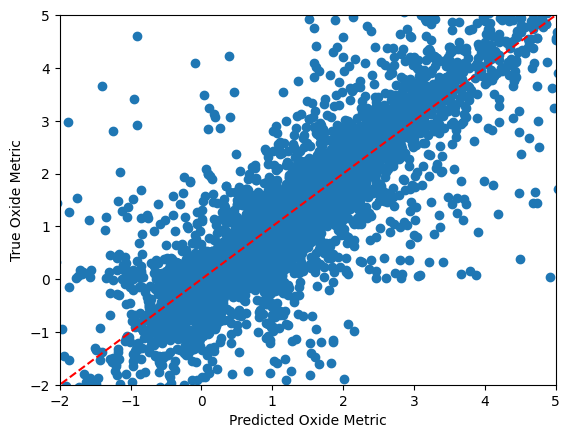

In [43]:
plt.scatter(predictions, test_targets)
x_values = range(int(min(predictions)), int(max(predictions)))
plt.plot(x_values, x_values, 'r--')  # 'r--' sets red dashed line style
plt.xlim(-2.0,5)
plt.ylim(-2.0,5)
plt.xlabel('Predicted Oxide Metric')
plt.ylabel('True Oxide Metric')

Text(0, 0.5, 'Realized Alloys Predicted Tc')

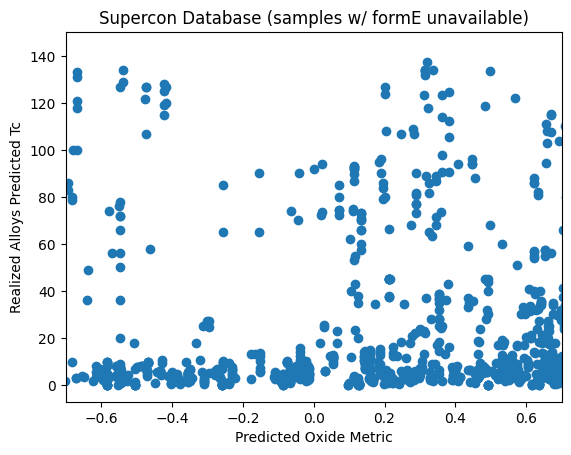

In [44]:
unknown_dtest = xgb.DMatrix(unknown_material, label=unknown_material)
predictedoxidemetric = model.predict(unknown_dtest)
plt.scatter(predictedoxidemetric, unknownmaterial_Tc)
plt.xlim(-0.7,0.7)
plt.title('Supercon Database (samples w/ formE unavailable)')
plt.xlabel('Predicted Oxide Metric')
plt.ylabel('Realized Alloys Predicted Tc')


# #### Organize training datasets here:
# target_possible
# training_possible_A = np.where(training_possible == 0, 9999, training_possible)
# target_realized
# training_realized_A = np.where(training_realized == 0, 9999, training_realized)
# target_material
# training_material_A = np.where(training_material == 0, 9999, training_material)


# #### We make predictions on these
# unknown_possible
# unknown_realized
# unknown_material

In [45]:
### Export data
realized_dtest = xgb.DMatrix(unknown_realized, label=unknown_realized)
realizedalloys_oxidemetric_known = model.predict(realized_dtest)
realizedoxidemetric = np.zeros_like(realizedalloys_names)

realizedoxidemetric[realizedalloys_dset[1] != 0] = realized_metric
realizedoxidemetric[realizedalloys_dset[1] == 0] = realizedalloys_oxidemetric_known
print(len(realizedoxidemetric))
print(len(realizedalloys_dset))

possible_dtest = xgb.DMatrix(unknown_possible, label=unknown_possible)
possiblealloys_oxidemetric_known = model.predict(possible_dtest)
possibleoxidemetric = np.zeros_like(possiblealloys_names)

possibleoxidemetric[possiblealloys_dset[1] != 0] = possible_metric
possibleoxidemetric[possiblealloys_dset[1] == 0] = possiblealloys_oxidemetric_known
print(len(possibleoxidemetric))
print(len(possiblealloys_dset))

material_dtest = xgb.DMatrix(unknown_material, label=unknown_material)
materialalloys_oxidemetric_known = model.predict(material_dtest)
materialoxidemetric = np.zeros_like(materialalloys_names)

materialoxidemetric[materialalloys_dset[1] != 0] = material_metric
materialoxidemetric[materialalloys_dset[1] == 0] = materialalloys_oxidemetric_known
print(len(materialoxidemetric))
print(len(materialalloys_dset))

49601
49601
105117
105117
21263
21263


In [46]:
np.savetxt('realizedalloys_dset_oxidemetricv2.csv', realizedoxidemetric, delimiter=',',fmt='%s')
np.savetxt('possiblealloys_dset_oxidemetricv2.csv', possibleoxidemetric, delimiter=',',fmt='%s')
np.savetxt('material_dset_oxidemetricv2.csv', materialoxidemetric, delimiter=',',fmt='%s')